In [1]:
from qiskit import Aer, QuantumCircuit, execute,QuantumRegister
from qiskit import IBMQ
from qiskit.visualization import plot_histogram
from math import pi
from qiskit.visualization import circuit_drawer
# circ = QuantumCircuit(4, 4)
# q=[0,1,2,3]
# circ.barrier()

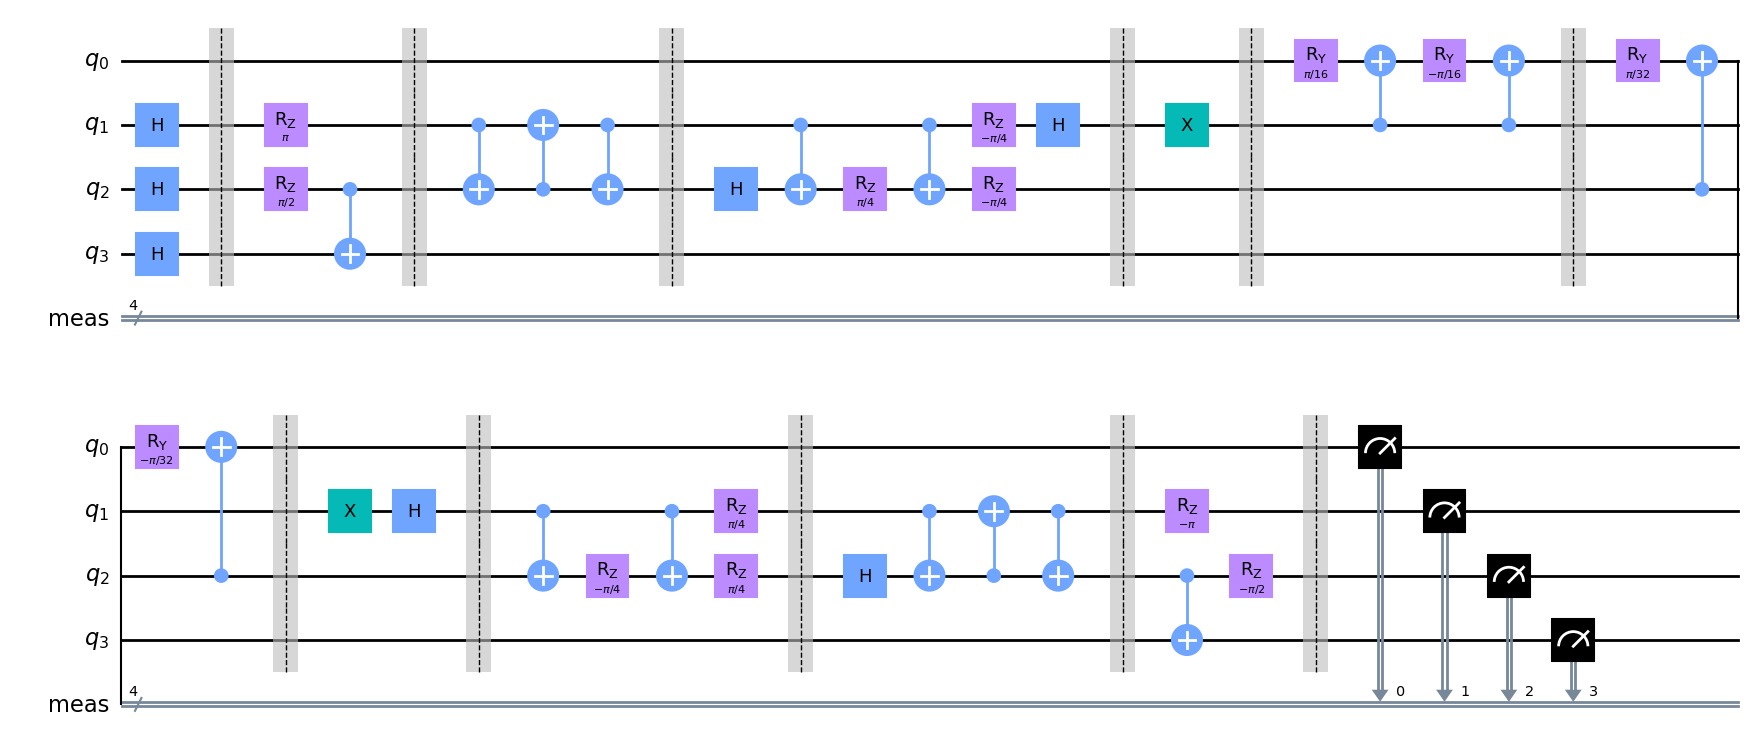

In [2]:
# q = QuantumRegister(4)

circ = QuantumCircuit(4)

# circ.h(q[1])
# circ.h(q[2])
# circ.h(q[3])
# circ.barrier()

# circ.rz(pi/2, q[2])
# circ.rz(pi, q[1])
# circ.cx(q[2], q[3])
# circ.barrier()

# circ.cx(q[1], q[2])
# circ.cx(q[2], q[1])
# circ.cx(q[1], q[2])
# circ.barrier()


# circ.h(q[2])
# circ.cx(q[1], q[2])
# circ.rz(pi/4, q[2])
# circ.cx(q[1], q[2])
# circ.rz(-pi/4, q[2])
# circ.rz(-pi/4, q[1])
# circ.h(q[1])
# circ.barrier()

# circ.x(q[1])
# circ.barrier()

# circ.ry(pi/16, q[0])
# circ.cx(q[1], q[0])
# circ.ry(-pi/16, q[0])
# circ.cx(q[1], q[0])
# circ.barrier()

# circ.ry(pi/32, q[0])
# circ.cx(q[2], q[0])
# circ.ry(-pi/32, q[0])
# circ.cx(q[2], q[0])
# circ.barrier()

# circ.x(q[1])
# circ.h(q[1])
# circ.barrier()

# circ.cx(q[1], q[2])
# circ.rz(-pi/4, q[2])
# circ.cx(q[1], q[2])
# circ.rz(pi/4, q[2])
# circ.rz(pi/4, q[1])
# circ.barrier()

# circ.h(q[2])
# circ.cx(q[1], q[2])
# circ.cx(q[2], q[1])
# circ.cx(q[1], q[2])
# circ.barrier()

# circ.cx(q[2], q[3]) 
# circ.rz(-pi, q[1])
# circ.rz(-pi/2, q[2])
# circ.measure_all()
# circ.draw(output='mpl')
circ.h(1)
circ.h(2)
circ.h(3)
circ.barrier()

circ.rz(pi/2, 2)
circ.rz(pi, 1)
circ.cx(2, 3)
circ.barrier()

circ.cx(1, 2)
circ.cx(2, 1)
circ.cx(1, 2)
circ.barrier()


circ.h(2)
circ.cx(1, 2)
circ.rz(pi/4, 2)
circ.cx(1, 2)
circ.rz(-pi/4, 2)
circ.rz(-pi/4, 1)
circ.h(1)
circ.barrier()

circ.x(1)
circ.barrier()

circ.ry(pi/16, 0)
circ.cx(1, 0)
circ.ry(-pi/16,0)
circ.cx(1, 0)
circ.barrier()

circ.ry(pi/32, 0)
circ.cx(2, 0)
circ.ry(-pi/32, 0)
circ.cx(2, 0)
circ.barrier()

circ.x(1)
circ.h(1)
circ.barrier()

circ.cx(1, 2)
circ.rz(-pi/4, 2)
circ.cx(1, 2)
circ.rz(pi/4, 2)
circ.rz(pi/4, 1)
circ.barrier()

circ.h(2)
circ.cx(1, 2)
circ.cx(2, 1)
circ.cx(1, 2)
circ.barrier()

circ.cx(2, 3) 
circ.rz(-pi, 1)
circ.rz(-pi/2, 2)
circ.measure_all()
circuit_drawer(circ, output='mpl', filename='circuit.png')

In [3]:
simulator = Aer.get_backend('aer_simulator')
job = execute(circ, simulator, shots=8000, memory=True)
result = job.result()

counts = result.get_counts(circ)
memory = result.get_memory(circ)
print(counts)

x = {'0':0,'1':0}
for i in memory:
	if i[3] == '1':
		if i[0] == '0':
			x['0'] = x['0'] + 1
		else:
			x['1'] = x['1'] + 1

p = x['0']/x['1']
print('probability of state 0001:', x['0'])
print('probability of state 1001:', x['1'])
print('the ratio of two probabilities', p)
print(counts)

{'0101': 93, '1001': 91, '0111': 79, '1101': 82, '1111': 91, '0001': 92, '0011': 88, '1011': 91, '1010': 970, '0110': 898, '1100': 876, '0100': 915, '1000': 886, '1110': 945, '0010': 889, '0000': 914}
probability of state 0001: 352
probability of state 1001: 355
the ratio of two probabilities 0.9915492957746479
{'0101': 93, '1001': 91, '0111': 79, '1101': 82, '1111': 91, '0001': 92, '0011': 88, '1011': 91, '1010': 970, '0110': 898, '1100': 876, '0100': 915, '1000': 886, '1110': 945, '0010': 889, '0000': 914}


In [4]:
plot_histogram(x, title='Bell-State counts').savefig('out0.png')
plot_histogram(counts, title='Bell-State counts').savefig('out1.png')